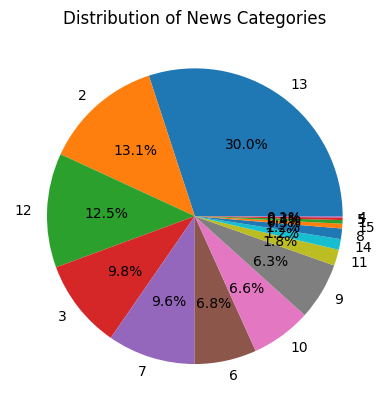

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/samyuktha/FYP/data/train.csv")


# Create a dictionary to map categories to IDs
category_to_id = {category: i+1 for i, category in enumerate(df['news_category'].unique())}

# Replace the categories in the DataFrame with their corresponding IDs
df['category_id'] = df['news_category'].map(category_to_id)

# Count the number of occurrences of each category ID
category_counts = df['category_id'].value_counts()

# Create a pie chart of the category counts with ID labels
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title("Distribution of News Categories")

plt.show()

In [17]:
import dill 

with open("/Users/samyuktha/FYP/data/model.pkl", "rb") as f:
    model = dill.load(f)

/Users/samyuktha/opt/anaconda3/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
chart=model.visualize_topics()

chart.write_html("/Users/samyuktha/FYP/data/topics.html")


In [22]:
with open("/Users/samyuktha/FYP/data/embeddings.pkl", "rb") as f:
    embeddings = dill.load(f)

In [24]:
df = pd.read_csv("/Users/samyuktha/FYP/data/train.csv")
df=df["news_title"]
docs = docs = [str(i) for i in df.values]

from umap import UMAP

reduced_embeddings = UMAP(n_neighbors=3, n_components=3, min_dist=0.5, metric='cosine').fit_transform(embeddings)



In [25]:

chart=model.visualize_documents(docs, reduced_embeddings=reduced_embeddings)

chart.write_html("/Users/samyuktha/FYP/data/documents.html")

In [26]:
chart=model.visualize_hierarchy()

chart.write_html("/Users/samyuktha/FYP/data/hierarchy.html")

chart


/Users/samyuktha/opt/anaconda3/envs/ml/lib/python3.9/site-packages/plotly/figure_factory/_dendrogram.py:350: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/Users/samyuktha/opt/anaconda3/envs/ml/lib/python3.9/site-packages/plotly/figure_factory/_dendrogram.py:351: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/Users/samyuktha/opt/anaconda3/envs/ml/lib/python3.9/site-packages/plotly/figure_factory/_dendrogram.py:352: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead

/Users/samyuktha/opt/anaconda3/envs/ml/lib/python3.9/site-packages/plotly/figure_factory/_dendrogram.py:353: DeprecationWarning:

scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead



In [27]:
chart=model.visualize_barchart()

chart.write_html("/Users/samyuktha/FYP/data/barchart.html")

chart

In [28]:
chart=model.visualize_heatmap()

chart.write_html("/Users/samyuktha/FYP/data/heatmap.html")

chart

In [32]:
from indicnlp.tokenize import sentence_tokenize, indic_tokenize


df = pd.read_csv("/Users/samyuktha/FYP/data/train.csv")



9999it [03:42, 44.85it/s]


In [36]:
docs = [str(i) for i in df.values]
timestamps=df["news_date"].values.tolist()

topics_over_time = model.topics_over_time(docs, timestamps, nr_bins=10)

chart=model.visualize_topics_over_time(topics_over_time)

chart.write_html("/Users/samyuktha/FYP/data/topics_over_time.html")

chart

10it [00:07,  1.28it/s]
